In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from experiment import Experiment

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC


# Import Data

In [40]:
df=pd.read_csv("data/WineQuality-RedWine.csv")
df.columns.shape

(12,)

In [3]:
exp=Experiment("data/WineQuality-RedWine.csv",'quality')
exp.preprocess(Pipeline(steps=[('ss',StandardScaler())]))

#Encode to make a binary problem
exp.y_train=[y>5 for y in exp.y_train]
exp.y_test=[y>5 for y in exp.y_test]

         count  percentage
quality                   
3           10    0.006254
4           53    0.033146
5          681    0.425891
6          638    0.398999
7          199    0.124453
8           18    0.011257


# Decision Trees

In [17]:
dt_gs_2=exp.tune_multiple_parameters(DecisionTreeClassifier(),{'max_depth':np.arange(1,31),'min_impurity_decrease':np.linspace(0,0.05,10)})

Grid search tuning <class 'sklearn.tree._classes.DecisionTreeClassifier'>
---------------------------------
Parameter Name: max_depth
Parameter values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
Parameter Name: min_impurity_decrease
Parameter values: [0.         0.00555556 0.01111111 0.01666667 0.02222222 0.02777778
 0.03333333 0.03888889 0.04444444 0.05      ]
Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Best parameters: {'max_depth': 14, 'min_impurity_decrease': 0.0}
Best score: 0.726


Tuning <class 'sklearn.tree._classes.DecisionTreeClassifier'>
---------------------------------
Parameter Name: max_depth
Parameter values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameter: 
	{'max_depth': 14}
Best score: 0.726


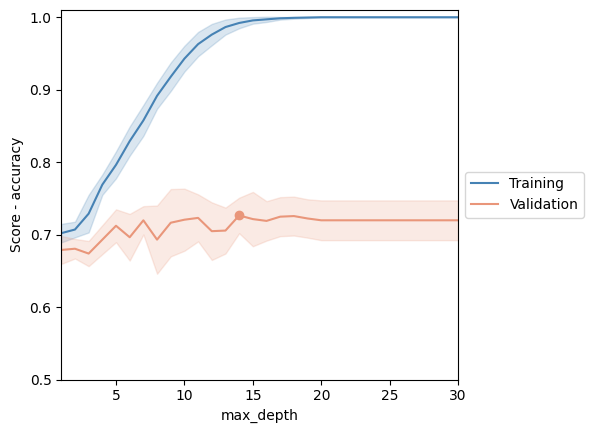

In [16]:
dt_gs_depth,ax=exp.tune_parameter(
    DecisionTreeClassifier(),'max_depth',np.arange(1,31))


Tuning <class 'sklearn.tree._classes.DecisionTreeClassifier'>
---------------------------------
Parameter Name: min_impurity_decrease
Parameter values: [0.      0.00125 0.0025  0.00375 0.005   0.00625 0.0075  0.00875 0.01
 0.01125 0.0125  0.01375 0.015   0.01625 0.0175  0.01875 0.02    0.02125
 0.0225  0.02375 0.025   0.02625 0.0275  0.02875 0.03   ]
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameter: 
	{'min_impurity_decrease': 0.0}
Best score: 0.726


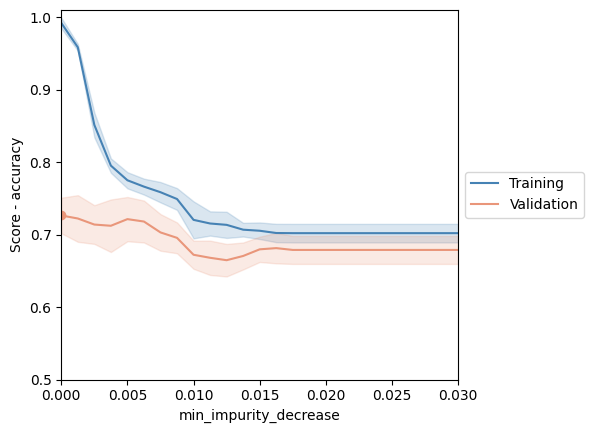

In [20]:
dt_gs_impurity,ax=exp.tune_parameter(DecisionTreeClassifier(max_depth=14),
    'min_impurity_decrease',np.linspace(0,0.03,25))



Fitting type(estimator)
--------------------------------------------------
Fit time: 0.005
Score time: 0.000
Final scores (accuracy):
	 Training 0.992
	 Validation 0.726
Classification report:
              precision    recall  f1-score   support

       False      0.715     0.690     0.702       561
        True      0.736     0.759     0.747       638

    accuracy                          0.726      1199
   macro avg      0.725     0.724     0.725      1199
weighted avg      0.726     0.726     0.726      1199



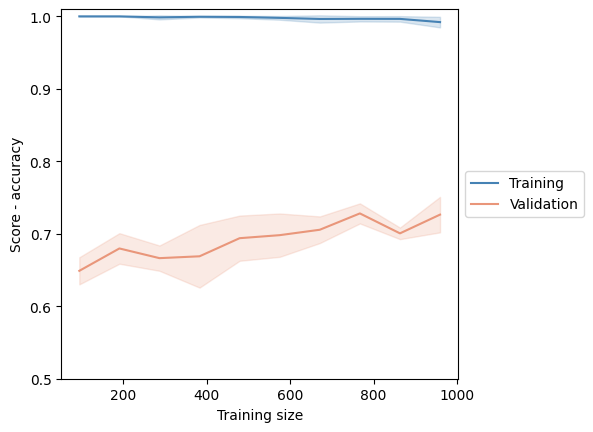

In [21]:
exp.learning_cv(DecisionTreeClassifier(max_depth=14))

plt.show()

              precision    recall  f1-score   support

       False      0.710     0.776     0.742       183
        True      0.795     0.733     0.763       217

    accuracy                          0.752       400
   macro avg      0.752     0.754     0.752       400
weighted avg      0.756     0.752     0.753       400



{'score': 0.7525,
 'fit_time': 0.006916046142578125,
 'params': {'ccp_alpha': 0.0,
  'class_weight': None,
  'criterion': 'gini',
  'max_depth': 14,
  'max_features': None,
  'max_leaf_nodes': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'random_state': 3,
  'splitter': 'best'},
 'conf_matr': array([[142,  41],
        [ 58, 159]]),
 'class_rep': {'False': {'precision': 0.71,
   'recall': 0.7759562841530054,
   'f1-score': 0.7415143603133159,
   'support': 183},
  'True': {'precision': 0.795,
   'recall': 0.7327188940092166,
   'f1-score': 0.7625899280575541,
   'support': 217},
  'accuracy': 0.7525,
  'macro avg': {'precision': 0.7525,
   'recall': 0.754337589081111,
   'f1-score': 0.752052144185435,
   'support': 400},
  'weighted avg': {'precision': 0.7561125000000001,
   'recall': 0.7525,
   'f1-score': 0.7529478558145651,
   'support': 400}},
 'estimator': DecisionTreeClassifier(max_depth=14, random_s

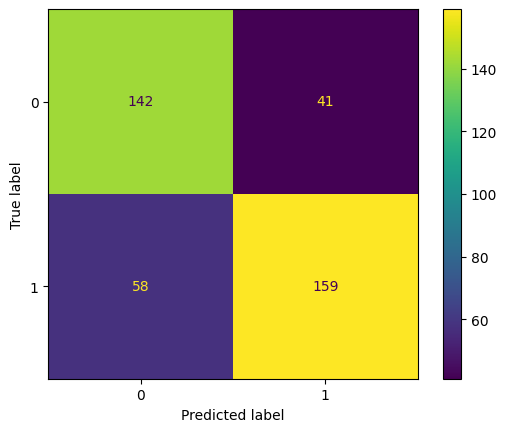

In [78]:
exp.final_test('Decision Tree',DecisionTreeClassifier(max_depth=14))

# Neural Nets

Evaluating number of nodes in a single layer

In [31]:
gs_ann=exp.tune_multiple_parameters(MLPClassifier(max_iter=1000),
    {'learning_rate_init':np.logspace(-4,0,9),
    'hidden_layer_sizes':np.arange(1,12)})

Grid search tuning <class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'>
---------------------------------
Parameter Name: learning_rate_init
Parameter values: [1.00000000e-04 3.16227766e-04 1.00000000e-03 3.16227766e-03
 1.00000000e-02 3.16227766e-02 1.00000000e-01 3.16227766e-01
 1.00000000e+00]
Parameter Name: hidden_layer_sizes
Parameter values: [ 1  2  3  4  5  6  7  8  9 10 11]
Fitting 5 folds for each of 99 candidates, totalling 495 fits


/Users/dle/homebrew/Caskroom/miniconda/base/envs/ML/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/dle/homebrew/Caskroom/miniconda/base/envs/ML/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/dle/homebrew/Caskroom/miniconda/base/envs/ML/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/dle/homebrew/Caskroom/miniconda/base/envs/ML/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterat

Best parameters: {'hidden_layer_sizes': 4, 'learning_rate_init': 0.001}
Best score: 0.755


Tuning <class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'>
---------------------------------
Parameter Name: hidden_layer_sizes
Parameter values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameter: 
	{'hidden_layer_sizes': 4}
Best score: 0.755
Tuning <class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'>
---------------------------------
Parameter Name: hidden_layer_sizes
Parameter values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameter: 
	{'hidden_layer_sizes': 7}
Best score: 0.754
Tuning <class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'>
---------------------------------
Parameter Name: hidden_layer_sizes
Parameter values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best paramet

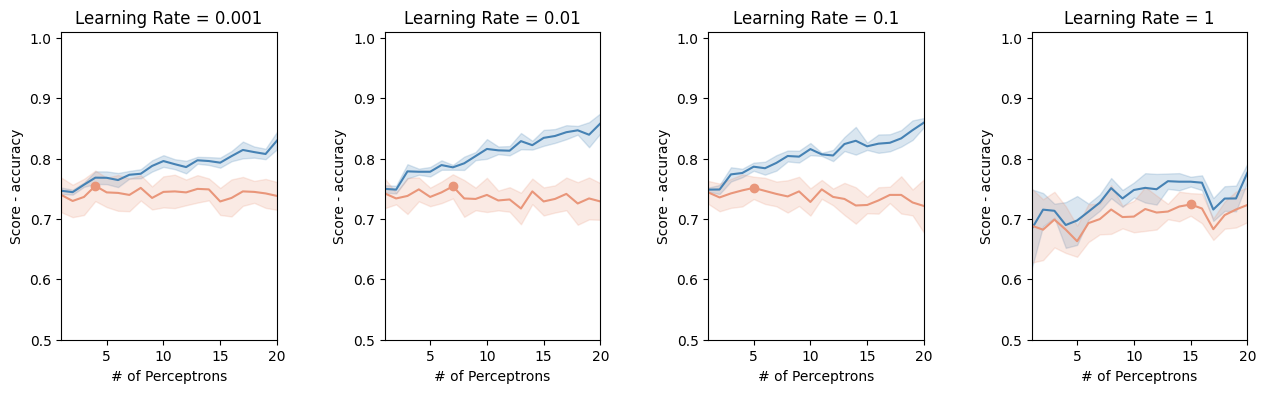

In [25]:
fig,axs=plt.subplots(1,4,figsize=(16,4))
param_range=np.arange(1,21)
lr=[1e-3,1e-2,1e-1,1]
for ax,l in zip(axs,lr):
    gs_1lyr,_=exp.tune_parameter(
    MLPClassifier(learning_rate_init=l,max_iter=10000),'hidden_layer_sizes',param_range,plot=False)
    exp.plot_validation('# of Perceptrons',param_range,gs_1lyr.cv_results_,ax)

    ax.get_legend().remove()
    ax.set_title(f'Learning Rate = {l}')
    


Tuning <class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'>
---------------------------------
Parameter Name: hidden_layer_sizes
Parameter values: [ 1  2  3  4  5  6  7  8  9 10 11]
Fitting 5 folds for each of 11 candidates, totalling 55 fits
Best parameter: 
	{'hidden_layer_sizes': 4}
Best score: 0.755


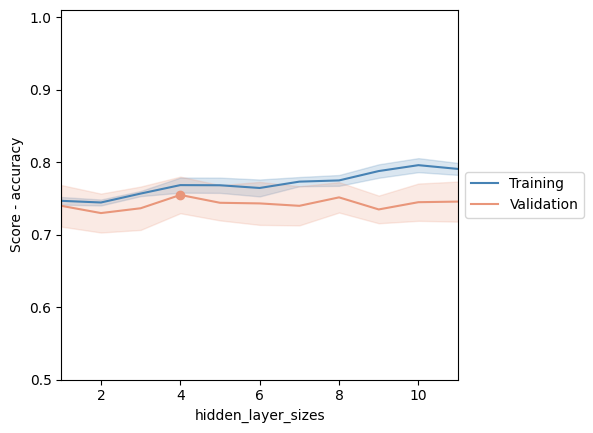

In [37]:
gs_size,ax=exp.tune_parameter(MLPClassifier(learning_rate_init=0.001,max_iter=10000),'hidden_layer_sizes',np.arange(1,12))


Learning rate

Tuning <class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'>
---------------------------------
Parameter Name: learning_rate_init
Parameter values: [1.00000000e-04 1.62377674e-04 2.63665090e-04 4.28133240e-04
 6.95192796e-04 1.12883789e-03 1.83298071e-03 2.97635144e-03
 4.83293024e-03 7.84759970e-03 1.27427499e-02 2.06913808e-02
 3.35981829e-02 5.45559478e-02 8.85866790e-02 1.43844989e-01
 2.33572147e-01 3.79269019e-01 6.15848211e-01 1.00000000e+00]
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameter: 
	{'learning_rate_init': 0.0018329807108324356}
Best score: 0.758


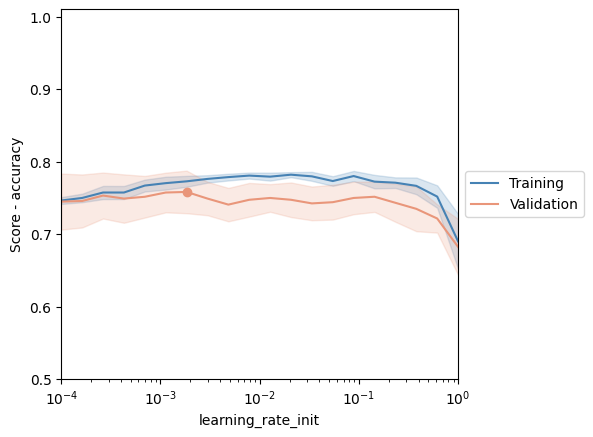

In [32]:
gs_lr,ax=exp.tune_parameter(MLPClassifier(hidden_layer_sizes=4,max_iter=10000),'learning_rate_init',np.logspace(-4,0,20),semi_logx=True)


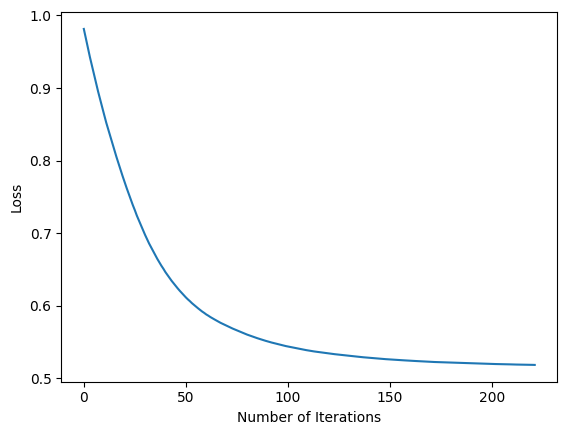

In [38]:
nn_opt=MLPClassifier(hidden_layer_sizes=4,learning_rate_init=0.001,max_iter=1000)
nn_opt.fit(exp.X_train,exp.y_train)
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.plot(nn_opt.loss_curve_)


              precision    recall  f1-score   support

       False      0.689     0.787     0.735       183
        True      0.796     0.700     0.745       217

    accuracy                          0.740       400
   macro avg      0.742     0.744     0.740       400
weighted avg      0.747     0.740     0.740       400



/Users/dle/homebrew/Caskroom/miniconda/base/envs/ML/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'score': 0.74,
 'fit_time': 0.11491894721984863,
 'params': {'activation': 'relu',
  'alpha': 0.0001,
  'batch_size': 'auto',
  'beta_1': 0.9,
  'beta_2': 0.999,
  'early_stopping': False,
  'epsilon': 1e-08,
  'hidden_layer_sizes': 4,
  'learning_rate': 'constant',
  'learning_rate_init': 0.001,
  'max_fun': 15000,
  'max_iter': 200,
  'momentum': 0.9,
  'n_iter_no_change': 10,
  'nesterovs_momentum': True,
  'power_t': 0.5,
  'random_state': 3,
  'shuffle': True,
  'solver': 'adam',
  'tol': 0.0001,
  'validation_fraction': 0.1,
  'verbose': False,
  'warm_start': False},
 'conf_matr': array([[144,  39],
        [ 65, 152]]),
 'class_rep': {'False': {'precision': 0.6889952153110048,
   'recall': 0.7868852459016393,
   'f1-score': 0.7346938775510204,
   'support': 183},
  'True': {'precision': 0.7958115183246073,
   'recall': 0.7004608294930875,
   'f1-score': 0.7450980392156862,
   'support': 217},
  'accuracy': 0.74,
  'macro avg': {'precision': 0.742403366817806,
   'recall': 0.74

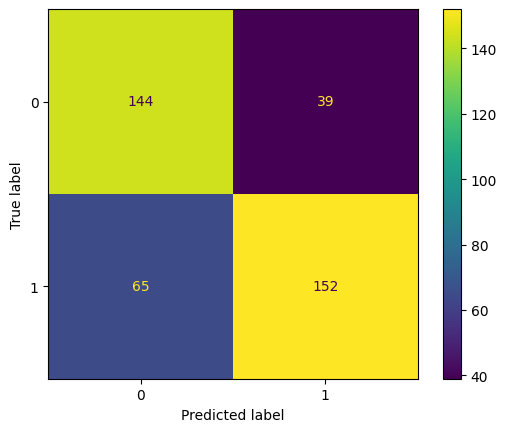

In [79]:
exp.final_test('NN',MLPClassifier(hidden_layer_sizes=4,learning_rate_init=0.001))

# Boosted

In [41]:
gs=exp.tune_multiple_parameters(AdaBoostClassifier(DecisionTreeClassifier(max_depth=5)),
    param_grid={
        "n_estimators":np.arange(5,100,5),
        "base_estimator__max_depth":np.arange(1,16)
    }
)

Grid search tuning <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>
---------------------------------
Parameter Name: n_estimators
Parameter values: [ 5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95]
Parameter Name: base_estimator__max_depth
Parameter values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Fitting 5 folds for each of 285 candidates, totalling 1425 fits
Best parameters: {'base_estimator__max_depth': 10, 'n_estimators': 70}
Best score: 0.796


Tuning <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>
---------------------------------
Parameter Name: n_estimators
Parameter values: [  5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85  90
  95 100]
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameter: 
	{'n_estimators': 60}
Best score: 0.752


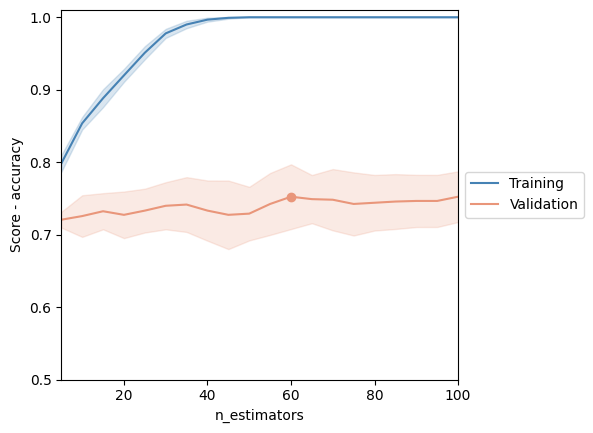

In [48]:
exp.tune_parameter(AdaBoostClassifier(DecisionTreeClassifier(max_depth=3)),'n_estimators',np.arange(5,101,5))
plt.show()

Tuning <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>
---------------------------------
Parameter Name: base_estimator__max_depth
Parameter values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameter: 
	{'base_estimator__max_depth': 10}
Best score: 0.787


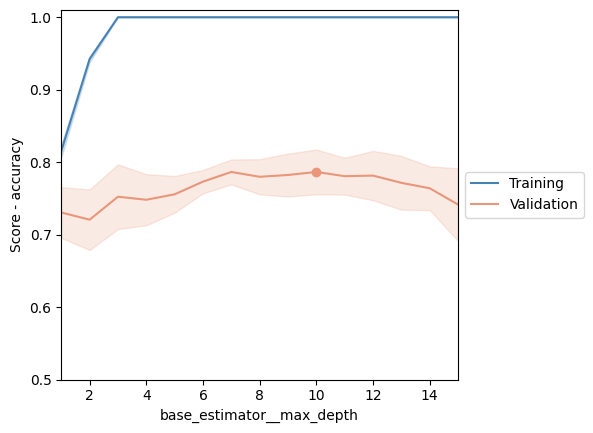

In [51]:
exp.tune_parameter(AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=60),'base_estimator__max_depth',np.arange(1,16))
plt.show()

Fitting type(estimator)
--------------------------------------------------
Fit time: 0.284
Score time: 0.011
Final scores (accuracy):
	 Training 1.000
	 Validation 0.746
Classification report:
              precision    recall  f1-score   support

       False      0.729     0.734     0.732       561
        True      0.765     0.760     0.763       638

    accuracy                          0.748      1199
   macro avg      0.747     0.747     0.747      1199
weighted avg      0.748     0.748     0.748      1199



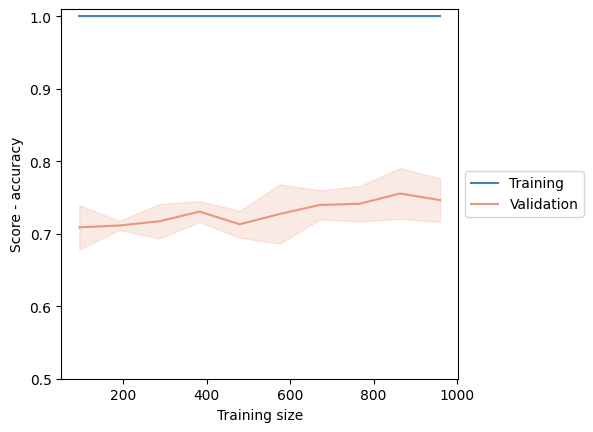

In [52]:
exp.learning_cv(AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),n_estimators=60))

plt.show()

              precision    recall  f1-score   support

       False      0.765     0.781     0.773       183
        True      0.812     0.797     0.805       217

    accuracy                          0.790       400
   macro avg      0.788     0.789     0.789       400
weighted avg      0.790     0.790     0.790       400



{'score': 0.79,
 'fit_time': 0.149885892868042,
 'params': {'algorithm': 'SAMME.R',
  'base_estimator__ccp_alpha': 0.0,
  'base_estimator__class_weight': None,
  'base_estimator__criterion': 'gini',
  'base_estimator__max_depth': 4,
  'base_estimator__max_features': None,
  'base_estimator__max_leaf_nodes': None,
  'base_estimator__min_impurity_decrease': 0.0,
  'base_estimator__min_samples_leaf': 1,
  'base_estimator__min_samples_split': 2,
  'base_estimator__min_weight_fraction_leaf': 0.0,
  'base_estimator__random_state': None,
  'base_estimator__splitter': 'best',
  'base_estimator': DecisionTreeClassifier(max_depth=4),
  'learning_rate': 1.0,
  'n_estimators': 60,
  'random_state': 3},
 'conf_matr': array([[143,  40],
        [ 44, 173]]),
 'class_rep': {'False': {'precision': 0.7647058823529411,
   'recall': 0.7814207650273224,
   'f1-score': 0.772972972972973,
   'support': 183},
  'True': {'precision': 0.812206572769953,
   'recall': 0.7972350230414746,
   'f1-score': 0.8046511

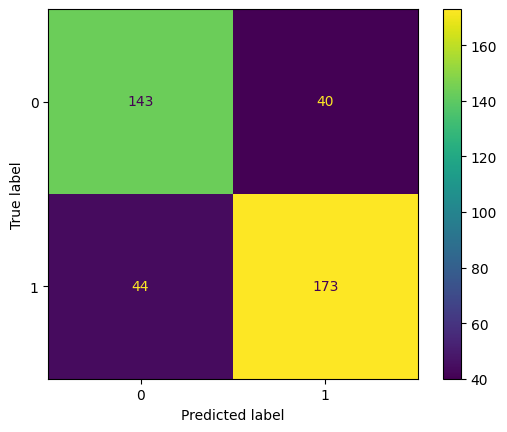

In [80]:
exp.final_test('boost',AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),n_estimators=60))

At a certain point, the train score is not increasing. Meaning any increase in validation score can't really be trusted and is more likely due to chance than better parameters.

# SVMs

In [69]:
gs_linear,ax=exp.tune_parameter(
    estimator=SVC(cache_size=1000,max_iter=1e8,tol=1e-6,kernel='linear',gamma=0.215),
    param_name='C',param_range=np.logspace(-2,2,21),semi_logx=True,
    plot=False
)

Tuning <class 'sklearn.svm._classes.SVC'>
---------------------------------
Parameter Name: C
Parameter values: [1.00000000e-02 1.58489319e-02 2.51188643e-02 3.98107171e-02
 6.30957344e-02 1.00000000e-01 1.58489319e-01 2.51188643e-01
 3.98107171e-01 6.30957344e-01 1.00000000e+00 1.58489319e+00
 2.51188643e+00 3.98107171e+00 6.30957344e+00 1.00000000e+01
 1.58489319e+01 2.51188643e+01 3.98107171e+01 6.30957344e+01
 1.00000000e+02]
Fitting 5 folds for each of 21 candidates, totalling 105 fits
Best parameter: 
	{'C': 0.6309573444801934}
Best score: 0.735


In [99]:
cv=gs_poly3.cv_results_
idx=np.argmax(cv['mean_test_score'])
print(np.log10(cv['params'][idx]['C']))
print(cv['mean_test_score'][idx])
print(cv['mean_train_score'][idx])

-0.3999999999999999
0.7372873082287309
0.8252724191866527


Tuning <class 'sklearn.svm._classes.SVC'>
---------------------------------
Parameter Name: C
Parameter values: [1.00000000e-02 1.58489319e-02 2.51188643e-02 3.98107171e-02
 6.30957344e-02 1.00000000e-01 1.58489319e-01 2.51188643e-01
 3.98107171e-01 6.30957344e-01 1.00000000e+00 1.58489319e+00
 2.51188643e+00 3.98107171e+00 6.30957344e+00 1.00000000e+01
 1.58489319e+01 2.51188643e+01 3.98107171e+01 6.30957344e+01
 1.00000000e+02]
Fitting 5 folds for each of 21 candidates, totalling 105 fits
Best parameter: 
	{'C': 0.6309573444801934}
Best score: 0.751


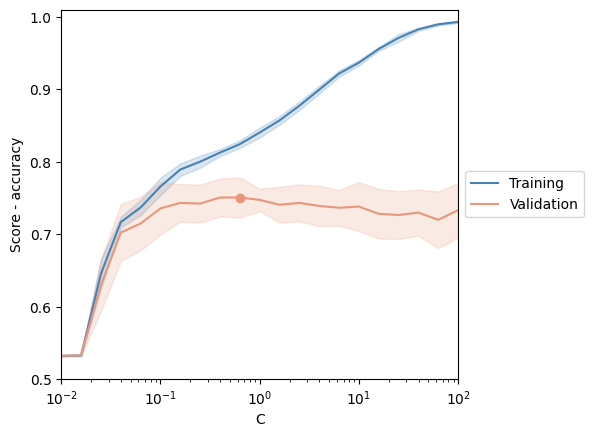

In [66]:
gs_rbf,ax=exp.tune_parameter(
    estimator=SVC(cache_size=1000,max_iter=1e6,tol=1e-6,kernel='rbf',gamma=0.215),
    param_name='C',param_range=np.logspace(-2,2,21),semi_logx=True,
    plot=True
)


Tuning <class 'sklearn.svm._classes.SVC'>
---------------------------------
Parameter Name: C
Parameter values: [1.00000000e-02 1.58489319e-02 2.51188643e-02 3.98107171e-02
 6.30957344e-02 1.00000000e-01 1.58489319e-01 2.51188643e-01
 3.98107171e-01 6.30957344e-01 1.00000000e+00 1.58489319e+00
 2.51188643e+00 3.98107171e+00 6.30957344e+00 1.00000000e+01
 1.58489319e+01 2.51188643e+01 3.98107171e+01 6.30957344e+01
 1.00000000e+02]
Fitting 5 folds for each of 21 candidates, totalling 105 fits
Best parameter: 
	{'C': 0.025118864315095794}
Best score: 0.723


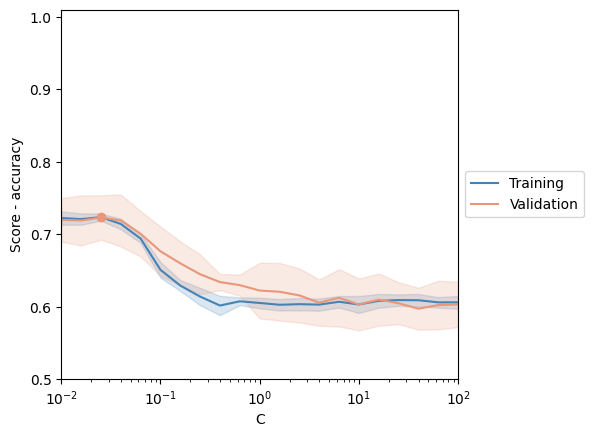

In [70]:
gs_sigmoid,ax=exp.tune_parameter(
    estimator=SVC(cache_size=1000,tol=1e-6,kernel='sigmoid',gamma=0.215),
    param_name='C',param_range=np.logspace(-2,2,21),semi_logx=True,
    plot=True
)


Tuning <class 'sklearn.svm._classes.SVC'>
---------------------------------
Parameter Name: C
Parameter values: [1.00000000e-02 1.58489319e-02 2.51188643e-02 3.98107171e-02
 6.30957344e-02 1.00000000e-01 1.58489319e-01 2.51188643e-01
 3.98107171e-01 6.30957344e-01 1.00000000e+00 1.58489319e+00
 2.51188643e+00 3.98107171e+00 6.30957344e+00 1.00000000e+01
 1.58489319e+01 2.51188643e+01 3.98107171e+01 6.30957344e+01
 1.00000000e+02]
Fitting 5 folds for each of 21 candidates, totalling 105 fits
Best parameter: 
	{'C': 1.584893192461114}
Best score: 0.651


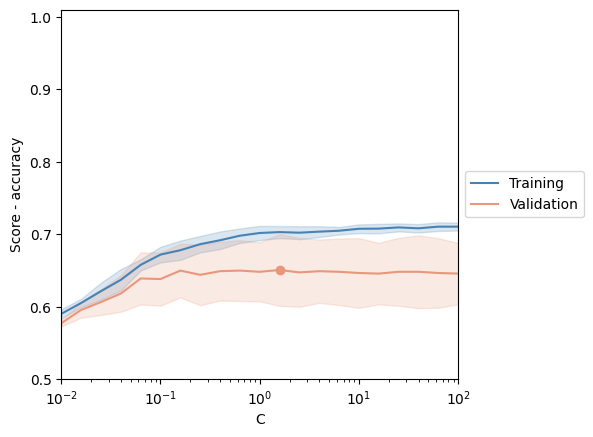

In [71]:
gs_poly2,_=exp.tune_parameter(
    estimator=SVC(cache_size=1000,max_iter=1e8,tol=1e-6,kernel='poly',degree=2,gamma=0.215),
    param_name='C',param_range=np.logspace(-2,2,21),semi_logx=True,
    plot=True
)


Tuning <class 'sklearn.svm._classes.SVC'>
---------------------------------
Parameter Name: C
Parameter values: [1.00000000e-02 1.58489319e-02 2.51188643e-02 3.98107171e-02
 6.30957344e-02 1.00000000e-01 1.58489319e-01 2.51188643e-01
 3.98107171e-01 6.30957344e-01 1.00000000e+00 1.58489319e+00
 2.51188643e+00 3.98107171e+00 6.30957344e+00 1.00000000e+01
 1.58489319e+01 2.51188643e+01 3.98107171e+01 6.30957344e+01
 1.00000000e+02]
Fitting 5 folds for each of 21 candidates, totalling 105 fits
Best parameter: 
	{'C': 0.3981071705534973}
Best score: 0.737


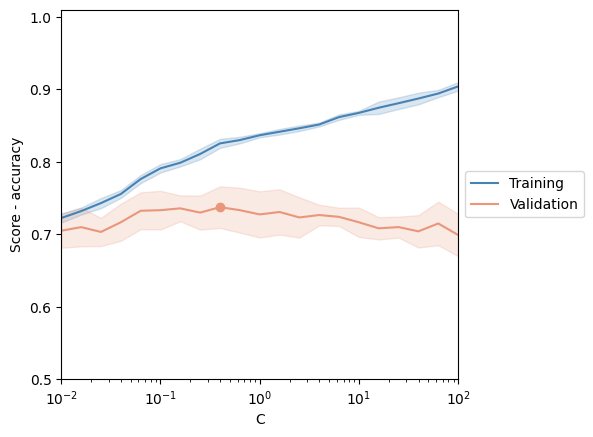

In [72]:
gs_poly3,_=exp.tune_parameter(
    estimator=SVC(cache_size=1000,max_iter=1e8,tol=1e-6,kernel='poly',degree=3,class_weight='balanced',gamma=0.215),
    param_name='C',param_range=np.logspace(-2,2,21),semi_logx=True,
    plot=True
)

In [63]:
C_range=np.logspace(-1,4,25)
gamma_range=np.logspace(-4,1,25)
gs_rbf_C_gam=exp.tune_multiple_parameters(SVC(cache_size=1000,kernel='rbf',tol=1e-3,max_iter=1e6,class_weight='balanced'),
    {'C':C_range,
    'gamma':gamma_range})


Grid search tuning <class 'sklearn.svm._classes.SVC'>
---------------------------------
Parameter Name: C
Parameter values: [1.00000000e-01 1.61559810e-01 2.61015722e-01 4.21696503e-01
 6.81292069e-01 1.10069417e+00 1.77827941e+00 2.87298483e+00
 4.64158883e+00 7.49894209e+00 1.21152766e+01 1.95734178e+01
 3.16227766e+01 5.10896977e+01 8.25404185e+01 1.33352143e+02
 2.15443469e+02 3.48070059e+02 5.62341325e+02 9.08517576e+02
 1.46779927e+03 2.37137371e+03 3.83118685e+03 6.18965819e+03
 1.00000000e+04]
Parameter Name: gamma
Parameter values: [1.00000000e-04 1.61559810e-04 2.61015722e-04 4.21696503e-04
 6.81292069e-04 1.10069417e-03 1.77827941e-03 2.87298483e-03
 4.64158883e-03 7.49894209e-03 1.21152766e-02 1.95734178e-02
 3.16227766e-02 5.10896977e-02 8.25404185e-02 1.33352143e-01
 2.15443469e-01 3.48070059e-01 5.62341325e-01 9.08517576e-01
 1.46779927e+00 2.37137371e+00 3.83118685e+00 6.18965819e+00
 1.00000000e+01]
Fitting 5 folds for each of 625 candidates, totalling 3125 fits
Best p

{'C': 0.1, 'gamma': 0.0001}
0.5078905160390516
{'C': 0.1, 'gamma': 0.00016155980984398745}
0.5078905160390516
{'C': 0.1, 'gamma': 0.0002610157215682536}
0.5078905160390516
{'C': 0.1, 'gamma': 0.00042169650342858224}
0.5078905160390516
{'C': 0.1, 'gamma': 0.0006812920690579615}
0.5078905160390516
{'C': 0.1, 'gamma': 0.0011006941712522103}
0.5078905160390516
{'C': 0.1, 'gamma': 0.0017782794100389228}
0.6897175732217573
{'C': 0.1, 'gamma': 0.0028729848333536655}
0.7147594142259415
{'C': 0.1, 'gamma': 0.004641588833612782}
0.7130822873082288
{'C': 0.1, 'gamma': 0.007498942093324558}
0.7230822873082288
{'C': 0.1, 'gamma': 0.012115276586285889}
0.7280892608089261
{'C': 0.1, 'gamma': 0.019573417814876617}
0.733089260808926
{'C': 0.1, 'gamma': 0.03162277660168379}
0.7330892608089261
{'C': 0.1, 'gamma': 0.051089697745069294}
0.7347629009762902
{'C': 0.1, 'gamma': 0.0825404185268019}
0.7364295676429568
{'C': 0.1, 'gamma': 0.1333521432163324}
0.736436541143654
{'C': 0.1, 'gamma': 0.21544346900318

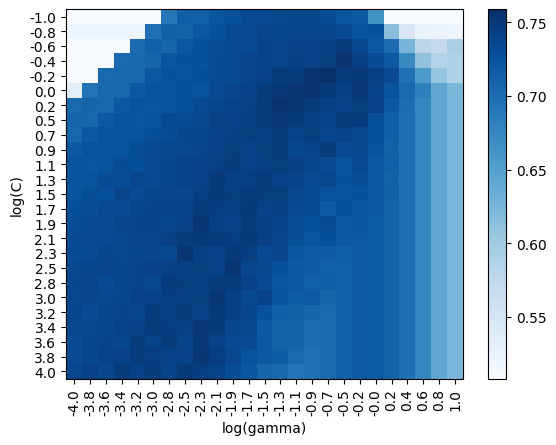

In [64]:
test_scores=np.ndarray((C_range.shape[0],gamma_range.shape[0]))
train_scores=np.ndarray((C_range.shape[0],gamma_range.shape[0]))

for p,test_score,train_score in zip(gs_rbf_C_gam.cv_results_['params'],gs_rbf_C_gam.cv_results_['mean_test_score'],gs_rbf_C_gam.cv_results_['mean_train_score']):
    print(p)
    print(test_score)
    i=np.where(C_range==p['C'])
    j=np.where(gamma_range==p['gamma'])
    test_scores[i,j]=test_score
    train_scores[i,j]=train_score

fig,ax=plt.subplots()

im=ax.imshow(test_scores,cmap='Blues',aspect='auto')
fig.colorbar(im)

ax.set_yticks(ticks=np.arange(0,C_range.shape[0]),labels=[f'{a:0.1f}' for a in np.log10(C_range)])
ax.set_xticks(ticks=np.arange(0,gamma_range.shape[0]),labels=[f'{a:0.1f}' for a in np.log10(gamma_range)],rotation=90)


ax.set_ylabel('log(C)')
ax.set_xlabel('log(gamma)')

plt.show()

Fitting type(estimator)
--------------------------------------------------
Fit time: 0.044
Score time: 0.009
Final scores (accuracy):
	 Training 0.825
	 Validation 0.751
Classification report:
              precision    recall  f1-score   support

       False      0.721     0.761     0.741       561
        True      0.779     0.741     0.760       638

    accuracy                          0.751      1199
   macro avg      0.750     0.751     0.750      1199
weighted avg      0.752     0.751     0.751      1199



({'train_sizes': array([ 95, 191, 287, 383, 479, 575, 671, 767, 863, 959]),
  'train_scores': array([[0.86315789, 0.91578947, 0.88421053, 0.87368421, 0.82105263],
         [0.87434555, 0.93193717, 0.84293194, 0.88481675, 0.83246073],
         [0.85714286, 0.87804878, 0.82926829, 0.84320557, 0.81881533],
         [0.85639687, 0.86684073, 0.84856397, 0.84856397, 0.83289817],
         [0.84968685, 0.87265136, 0.8434238 , 0.83716075, 0.82463466],
         [0.84173913, 0.85043478, 0.82956522, 0.83652174, 0.82956522],
         [0.82861401, 0.84351714, 0.82265276, 0.84202683, 0.82116244],
         [0.82790091, 0.83441982, 0.81616688, 0.83441982, 0.81747066],
         [0.82155272, 0.83661645, 0.82155272, 0.82850521, 0.81923523],
         [0.82377477, 0.83420229, 0.82168926, 0.82273201, 0.82064651]]),
  'test_scores': array([[0.67083333, 0.66666667, 0.70833333, 0.6875    , 0.69037657],
         [0.72083333, 0.72916667, 0.74166667, 0.72083333, 0.65690377],
         [0.71666667, 0.7125    , 0.762

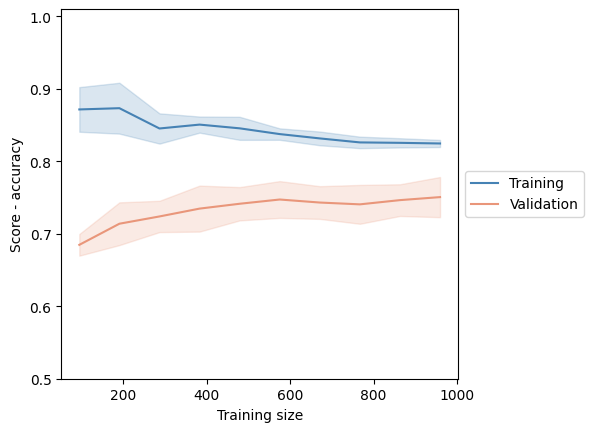

In [73]:
exp.learning_cv(SVC(cache_size=1000,max_iter=1e8,tol=1e-6,kernel='rbf',gamma=0.215,C=0.630))

Index([], dtype='object')


(array([0.09974979, 0.01818182, 0.02018349, 0.01834862, 0.02018349,
        0.0206839 , 0.02301918, 0.01784821, 0.0528774 , 0.03302752,
        0.03436197]),
 <AxesSubplot:xlabel='Feature', ylabel='Importance'>)

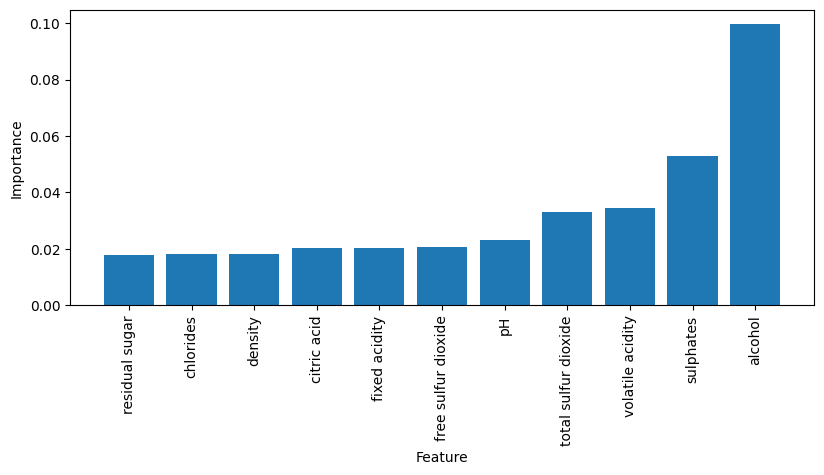

In [74]:
exp.perm_ft_importance(gs_rbf.best_estimator_)

              precision    recall  f1-score   support

       False      0.725     0.809     0.765       183
        True      0.821     0.742     0.780       217

    accuracy                          0.773       400
   macro avg      0.773     0.775     0.772       400
weighted avg      0.778     0.772     0.773       400



{'score': 0.7725,
 'fit_time': 0.02138686180114746,
 'params': {'C': 0.63,
  'break_ties': False,
  'cache_size': 1000,
  'class_weight': None,
  'coef0': 0.0,
  'decision_function_shape': 'ovr',
  'degree': 3,
  'gamma': 0.215,
  'kernel': 'rbf',
  'max_iter': -1,
  'probability': False,
  'random_state': 3,
  'shrinking': True,
  'tol': 0.001,
  'verbose': False},
 'conf_matr': array([[148,  35],
        [ 56, 161]]),
 'class_rep': {'False': {'precision': 0.7254901960784313,
   'recall': 0.8087431693989071,
   'f1-score': 0.7648578811369509,
   'support': 183},
  'True': {'precision': 0.8214285714285714,
   'recall': 0.7419354838709677,
   'f1-score': 0.7796610169491526,
   'support': 217},
  'accuracy': 0.7725,
  'macro avg': {'precision': 0.7734593837535013,
   'recall': 0.7753393266349374,
   'f1-score': 0.7722594490430517,
   'support': 400},
  'weighted avg': {'precision': 0.7775367647058823,
   'recall': 0.7725,
   'f1-score': 0.7728885823150702,
   'support': 400}},
 'estimato

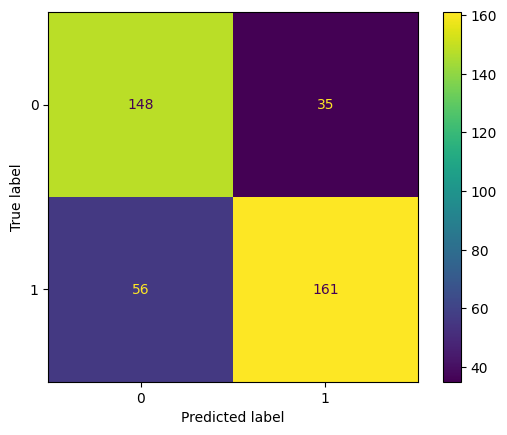

In [82]:
exp.final_test('SVM',SVC(cache_size=1000,kernel='rbf',gamma=0.215,C=0.630))

# KNN

Tuning <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
---------------------------------
Parameter Name: n_neighbors
Parameter values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
Invalid parameter 'random_state' for estimator KNeighborsClassifier(n_jobs=-1). Valid parameters are: ['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'].
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameter: 
	{'n_neighbors': 1}
Best score: 0.740
Tuning <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
---------------------------------
Parameter Name: n_neighbors
Parameter values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
Invalid parameter 'random_state' for estimator KNeighborsClassifier(n_jobs=-1, weights='distance'). Valid parameters are: ['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighb

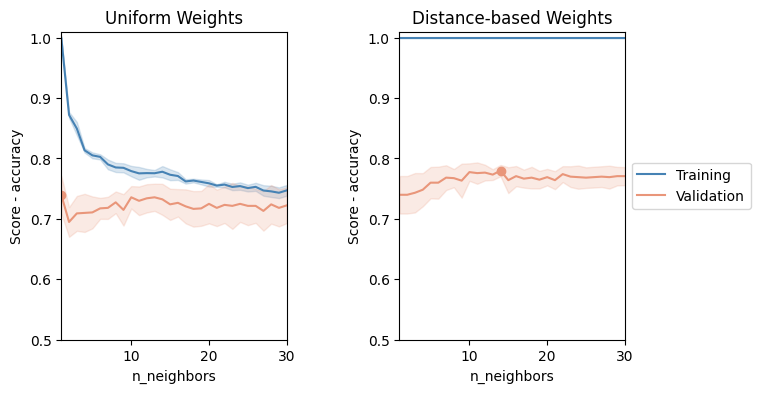

In [75]:
fig, axs=plt.subplots(1,2,figsize=(8,4))

for ax,w in zip(axs,['uniform','distance']):

    gs,_=exp.tune_parameter(estimator=KNeighborsClassifier(n_jobs=-1,weights=w),
        param_name='n_neighbors',
        param_range=np.arange(1,31,1),plot=False
    )

    exp.plot_validation('n_neighbors',np.arange(1,31,1),gs.cv_results_,ax)

axs[0].set_title('Uniform Weights')
axs[1].set_title('Distance-based Weights')
axs[0].get_legend().remove()

Invalid parameter 'random_state' for estimator KNeighborsClassifier(n_neighbors=14, weights='distance'). Valid parameters are: ['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'].
Fitting type(estimator)
--------------------------------------------------
Fit time: 0.001
Score time: 0.008
Final scores (accuracy):
	 Training 1.000
	 Validation 0.780
Classification report:
              precision    recall  f1-score   support

       False      0.783     0.733     0.757       561
        True      0.777     0.821     0.799       638

    accuracy                          0.780      1199
   macro avg      0.780     0.777     0.778      1199
weighted avg      0.780     0.780     0.779      1199



({'train_sizes': array([ 95, 191, 287, 383, 479, 575, 671, 767, 863, 959]),
  'train_scores': array([[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]),
  'test_scores': array([[0.675     , 0.67083333, 0.725     , 0.69583333, 0.71966527],
         [0.7       , 0.69166667, 0.75      , 0.69166667, 0.71129707],
         [0.7375    , 0.7375    , 0.77916667, 0.70833333, 0.67782427],
         [0.7625    , 0.72083333, 0.75833333, 0.72083333, 0.70711297],
         [0.74583333, 0.70833333, 0.76666667, 0.725     , 0.71966527],
         [0.74166667, 0.7125    , 0.775     , 0.71666667, 0.76150628],
         [0.74166667, 0.73333333, 0.77083333, 0.725     , 0.76987448],
         [0.75833333, 0.75      , 0.7625    , 0.72083333, 0.76150628],
         [0.7

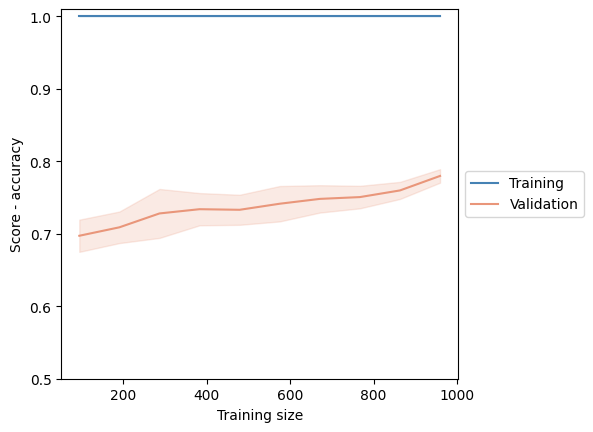

In [83]:
exp.learning_cv(KNeighborsClassifier(n_neighbors=14,weights='distance'))


Invalid parameter 'random_state' for estimator KNeighborsClassifier(n_neighbors=14, weights='distance'). Valid parameters are: ['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'].
              precision    recall  f1-score   support

       False      0.833     0.792     0.812       183
        True      0.832     0.866     0.849       217

    accuracy                          0.833       400
   macro avg      0.833     0.829     0.831       400
weighted avg      0.833     0.833     0.832       400



{'score': 0.8325,
 'fit_time': 0.0022118091583251953,
 'params': {'algorithm': 'auto',
  'leaf_size': 30,
  'metric': 'minkowski',
  'metric_params': None,
  'n_jobs': None,
  'n_neighbors': 14,
  'p': 2,
  'weights': 'distance'},
 'conf_matr': array([[145,  38],
        [ 29, 188]]),
 'class_rep': {'False': {'precision': 0.8333333333333334,
   'recall': 0.7923497267759563,
   'f1-score': 0.8123249299719888,
   'support': 183},
  'True': {'precision': 0.831858407079646,
   'recall': 0.8663594470046083,
   'f1-score': 0.8487584650112867,
   'support': 217},
  'accuracy': 0.8325,
  'macro avg': {'precision': 0.8325958702064897,
   'recall': 0.8293545868902823,
   'f1-score': 0.8305416974916378,
   'support': 400},
  'weighted avg': {'precision': 0.832533185840708,
   'recall': 0.8325,
   'f1-score': 0.8320901227308078,
   'support': 400}},
 'estimator': KNeighborsClassifier(n_neighbors=14, weights='distance')}

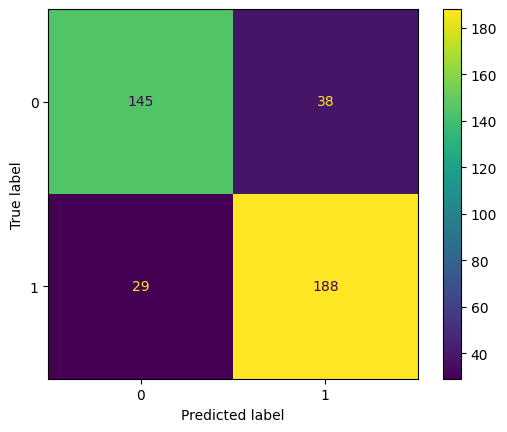

In [84]:
exp.final_test('knn',KNeighborsClassifier(n_neighbors=14,weights='distance'))